# Práctico Parte II 
## Optativa Series de Tiempo - 2024


### Consigna

Tomando como orientación el jupyter-notebook "GARCH_Modelo_de_activos.ipynb", se pide:
- Seleccionar de Yahoo Finance https://es.finance.yahoo.com/ un activo, un índice, o un tipo de cambio. Descargar una serie con datos diarios que abarque al menos 10 años.
- Aplicar la transformación .pctchange y seleccionar una de las columnas ['Close'] o ['Adj Close']. 
- Si el test ADF no rechaza la existencia de una raíz unitaria para esta transformación, elija otro conjunto de datos.
- Plotee los valores y el cuadrado de los valores, y ajuste un modelo GARCH adecuado. Procure que el modelo sea simple ($p, q <= 3$).
- Muestre en un gráfico que la volatilidad se adecua a la serie que se está modelando.
- Entrene el modelo y realice una predicción de 5 valores de la volatilidad.

## Cargar paquetes

In [155]:
#import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import os

## Volatilidad de Coca-Cola

In [157]:
os.getcwd()


'C:\\Users\\santi\\Downloads\\series temporales'

In [158]:
ko = pd.read_csv('ko_10years.csv', index_col='Date', parse_dates=True)
ko.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,41.900002,42.259998,41.880001,42.250000,30.762693,12441100
2014-09-30,42.099998,42.810001,42.080002,42.660000,31.061214,22613700
2014-10-01,42.549999,42.849998,42.369999,42.740002,31.119459,30409700
2014-10-02,42.599998,42.779999,42.419998,42.660000,31.061214,16643200
2014-10-03,42.860001,43.070000,42.660000,43.000000,31.308771,14046300


In [159]:
returns = 100 * ko.Close.pct_change().dropna()

Text(0.5, 1.0, 'Coca-cola Returns')

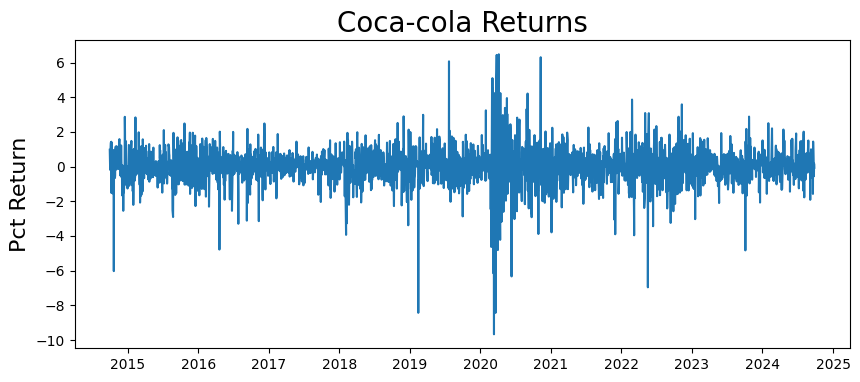

In [160]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Coca-cola Returns', fontsize=20)

Los retornos muestran un cluster de volatilidad muy grande en el 2020 y algunos menos notorios.

## PACF

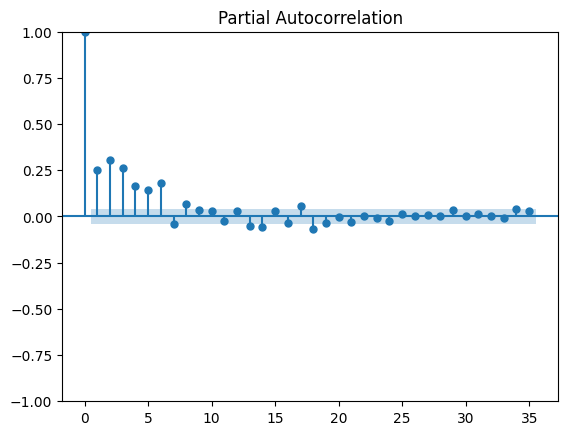

In [163]:
plot_pacf(returns**2)
plt.show()

La autocorrelación parcial se mantiene relativamente alta (por encima del intervalo de confianza) hasta el orden 6. Esto sugiere  hay una estructura compleja de autocorrelación en la volatilidad.

## Ajustar GARCH(p,q)

Debido a lo explicado en el punto anterior de la PACF, parece ser razonable comenzar con un modelo GARCH(3,3) ya que es el modelo más complejo recomendado y  en la práctica funciona bien en muchas situaciones financieras, capturando adecuadamente la volatilidad. Modelos GARCH más complejos por lo visto en clase parecen ser raros.

In [166]:
model = arch_model(returns, p= 3, q= 3)

In [167]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 12893.670512588871
Iteration:      2,   Func. Count:     23,   Neg. LLF: 272234.6132288824
Iteration:      3,   Func. Count:     35,   Neg. LLF: 4266.934047115772
Iteration:      4,   Func. Count:     46,   Neg. LLF: 4043.7709801232845
Iteration:      5,   Func. Count:     57,   Neg. LLF: 3611.8409619740196
Iteration:      6,   Func. Count:     67,   Neg. LLF: 3612.840168561308
Iteration:      7,   Func. Count:     77,   Neg. LLF: 3572.838627356604
Iteration:      8,   Func. Count:     87,   Neg. LLF: 3604.8394023199403
Iteration:      9,   Func. Count:     97,   Neg. LLF: 3560.2612087990587
Iteration:     10,   Func. Count:    107,   Neg. LLF: 3577.3154697409873
Iteration:     11,   Func. Count:    117,   Neg. LLF: 3560.791759025781
Iteration:     12,   Func. Count:    127,   Neg. LLF: 3555.7860813651782
Iteration:     13,   Func. Count:    136,   Neg. LLF: 3555.7544681006093
Iteration:     14,   Func. Count:    145,   Neg. LLF: 35

In [168]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3555.71
Distribution:                  Normal   AIC:                           7127.41
Method:            Maximum Likelihood   BIC:                           7174.05
                                        No. Observations:                 2515
Date:                Fri, Sep 27 2024   Df Residuals:                     2514
Time:                        14:04:26   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0342  2.123e-02      1.611      0.107 [-7.417e-03,7.582e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0517  4.923e-02      1.050      0.294   [-4.480e-02,  0.148]
alpha[1]       0.0349  2.069e-02      1.685  9.207e-02 [-5.698e-03,7.540e-02]
alpha[2]       0.0645  3.250e-02      1.984  4.724e-02    [7.866e-04,  0.128]
alpha[3]       0.0303  3.370e-02      0.899      0.369 [-3.575e-02,9.636e-02]
beta[1]        0.0000      0.207      0.000      1.000      [ -0.405,  0.405]
beta[2]        0.1593      0.157      1.012      0.312      [ -0.149,  0.468]
beta[3]        0.6661      0.166      4.017  5.889e-05      [  0.341,  0.991]
=============================================================================

Covariance estimator: robust
"""

El resultado del modelo nos muestra un AIC de 7127.41 y BIC de 7174.05 que habría que comparar con modelos posteriores. Respecto a los coeficientes El omega no es significativo, lo que indica que este parámetro no contribuya significativamente a la explicación de la varianza. El alpha1 tampoco es significativo, pero el alph2 si lo es (p = 0.04724) esto indica que los errores pasados aportando a la varianza condicional. Esto sugiere que la volatilidad actual depende de los errores pasados al cuadrado en el t-2 (choques de volatilidad recientes = t-2), habría que considerar que el intervalo de confianza por muy poco no incluye al 0 y el p esta muy cerca del 0.05, es decir que es casi marginalmente significativo, esto indicaría que el efecto es leve. El beta1 y beta2 no fueron significativos, mientras que le beta3 si lo fue (p = 5.889e-05) con un intervalo de confianza de [0.341, 0.991] por su puesto no incluye el 0. Indica que la varianza condicional depende de la varianza condicional pasada en el t-3, la volatilidad es persistente. Sugiere que los choques en la volatilidad tardan en disiparse.
A continuación hacemos una prueba para comprobar que los residuos al cuadrado (y estandarizados) no están autocorrelacionados, lo que nos daría un indicios de si el modelo captura adecuadamente la dinámica de volatilidad

      lb_stat  lb_pvalue
10  14.522818   0.150452


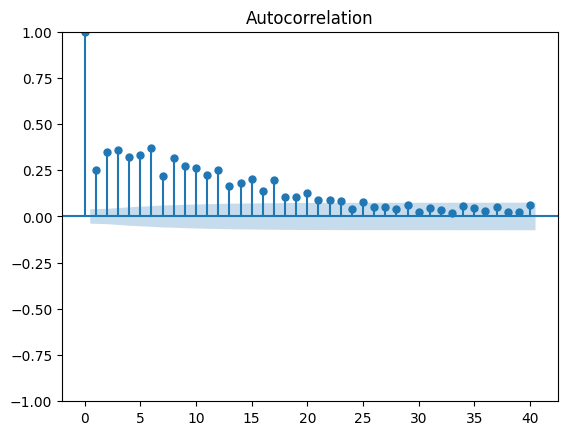

In [170]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Residuos estandarizados
standardized_residuals = model_fit.resid / model_fit.conditional_volatility

# Prueba de autocorrelación (Ljung-Box) sobre los residuos estandarizados
lb_test = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print(lb_test)

residuals = model_fit.resid
plot_acf(residuals**2, lags=40)
plt.show()

La prueba Ljung-box tiene como h0 = No hay autocorrelación en los residuos hasta el rezago  h. Esto significa que cualquier autocorrelación observada es atribuible al azar, mientras que h1 es que hay autocorrelación significativa de los residuos estandarizados. El resultado de la prueba de p = 0.150 lo que nos indica que no hay evidencias suficientes para decir que los residuos estandarizados presentan autocorrelación.
Con respecto al gráfico de correlación de los residuos vemos que los primeros lags presentan autocorrelación por encima del intervalo de confianza aunque es relativamente baja (0.3), Luego baja considerablemente. Esto sugiere que parte de la heterocedasticidad ha sido modelada por el GARCH(3,3), pero aún podrían quedar algunos patrones no capturados en los primeros lags.
A continuación se probará un modelo más simple ya que el alpha3 no dió significativo. El modelo a continuación será GARCH(2,3).

In [172]:
model2 = arch_model(returns, p= 2, q= 3)
model2_fit = model3.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14257745188.958683
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7333293985.76181
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4568.733543312431
Iteration:      4,   Func. Count:     30,   Neg. LLF: 3583.4051234183617
Iteration:      5,   Func. Count:     36,   Neg. LLF: 3558.7366277883166
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3586.235184746074
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3556.9008330088445
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3556.8997937280187
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3556.899783994895
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3556.8997839906997
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3556.899783994895
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [173]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3556.90
Distribution:                  Normal   AIC:                           7121.80
Method:            Maximum Likelihood   BIC:                           7145.12
                                        No. Observations:                 2515
Date:                Fri, Sep 27 2024   Df Residuals:                     2514
Time:                        14:04:27   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0335  2.087e-02      1.605      0.109 [-7.413e-03,7.440e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0193  1.670e-02      1.158      0.247 [-1.339e-02,5.207e-02]
alpha[1]       0.0475  2.040e-02      2.329  1.986e-02  [7.531e-03,8.751e-02]
beta[1]        0.9355  3.497e-02     26.754 1.114e-157      [  0.867,  1.004]
=============================================================================

Covariance estimator: robust
"""

El modelo no muestra un patrón similar al anterior. No da significativo ningun parámetro. Esto nos indicaría que la volatilidad en el tiempo t no depende ni de los choques de volatilidad anteriores ni de la varianza condicional pasada. Esto es raro respecto al modelo anterior , aunque el AIC es levemente más bajo.
A continuación vamos a probar un modelo GARCH más simple GARCH(1,1) para tener una tercera comparación.

In [175]:
model3 = arch_model(returns, p= 1, q= 1)
model3_fit = model3.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14257745188.958683
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7333293985.76181
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4568.733543312431
Iteration:      4,   Func. Count:     30,   Neg. LLF: 3583.4051234183617
Iteration:      5,   Func. Count:     36,   Neg. LLF: 3558.7366277883166
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3586.235184746074
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3556.9008330088445
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3556.8997937280187
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3556.899783994895
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3556.8997839906997
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3556.899783994895
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [176]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3556.90
Distribution:                  Normal   AIC:                           7121.80
Method:            Maximum Likelihood   BIC:                           7145.12
                                        No. Observations:                 2515
Date:                Fri, Sep 27 2024   Df Residuals:                     2514
Time:                        14:04:27   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0335  2.087e-02      1.605      0.109 [-7.413e-03,7.440e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0193  1.670e-02      1.158      0.247 [-1.339e-02,5.207e-02]
alpha[1]       0.0475  2.040e-02      2.329  1.986e-02  [7.531e-03,8.751e-02]
beta[1]        0.9355  3.497e-02     26.754 1.114e-157      [  0.867,  1.004]
=============================================================================

Covariance estimator: robust
"""

Este modelo simple es más coherente con el primer modelo realizado. Dónde la varianza condicional del tiempo t (voaltilidad) depende de los errores y de la varianza condicional pasada, pero a diferencia del primer modelo, en este, dependería del tiempo t-1 (significancia del alpha1 y beta1 respectivamente). Aunque para el alha1 el efecto sobre la varianza condicional parece leve (p = 0.01986 e intevalo de confianza muy cerca del 0). El AIC es el más bajo obtenido entre los modelos aquí probados. Aunque hay indicios de que este sería levemente mejor que el primer modelo, por ser más simple y tener el AIC más bajo, por la estructura de autocorrelación del primer modelo, pareciera haber una necesidad de modelos más complejos para modelar esta volatilidad (no uno más simple) por lo que utilizaremos el primero para las predicciones, sabiendo que no está explicando todos los patrones subyacentes de la dinámica de volatilidad en COCA-COLA.

## Rolling Forecast

In [179]:
rolling_predictions = []
test_size = int(2515*.25) ### el 25 por ciento de los datos. quizás estamos usando pocos años. 

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [180]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])
rolling_predictions

Date
2022-03-29    1.161465
2022-03-30    1.226978
2022-03-31    1.154122
2022-04-01    1.081151
2022-04-04    1.160735
                ...   
2024-09-20    0.889244
2024-09-23    0.954678
2024-09-24    0.933530
2024-09-25    0.893067
2024-09-26    0.905538
Length: 628, dtype: float64

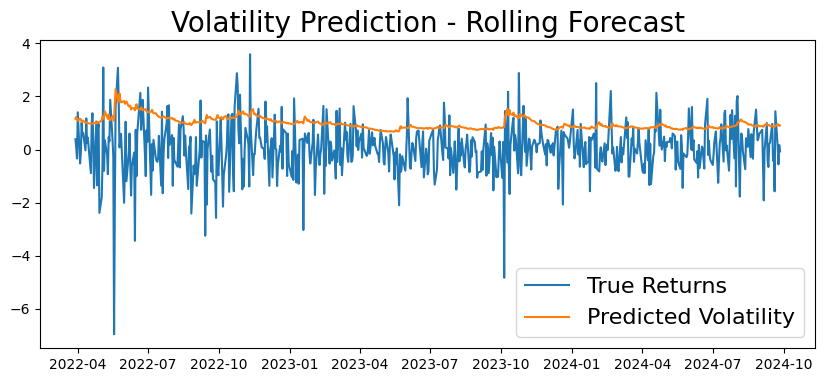

In [181]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

La volatilidad predicha por el modelo GARCH  parece subestimar la volatilidad real, especialmente en los momentos de mayor variabilidad en los retornos. No captura bien la volatilidad en los extremos de los rendimientos (retornos).

# Predecir 5 días

In [184]:
train = returns
model = arch_model(train, p=3, q=3)
model_fit = model.fit(disp='off') ## reentrenamiento completo

In [185]:
horiz = 5
pred = model_fit.forecast(horizon= horiz)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,horiz+1)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 5 Days')

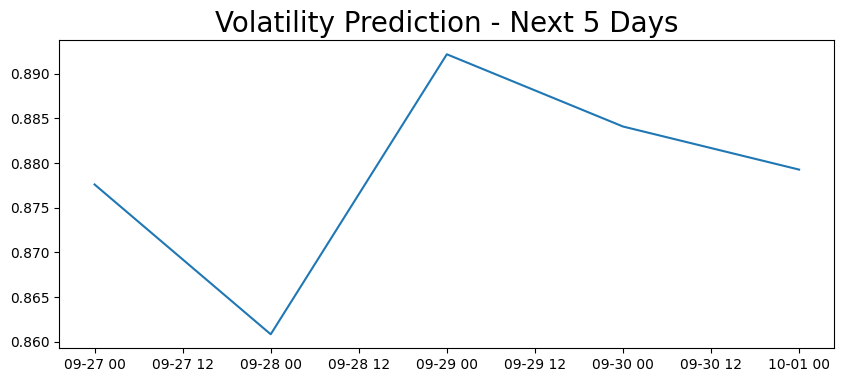

In [186]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 5 Days', fontsize=20)

La predicción a 5 días muestra un descenso muy bajo de volatilidad seguido de un aumento y luego se estabiliza. Viendo la magnitud practicamente se mandendría constante varía en un rando de 0.03. Creemos que este modelo no está capturando toda la complejidad de la dinámica de volatilidad